<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [24]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Display the first few rows of the data
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


COUNT(*)
0     65437

## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568

## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [18]:
df['CompTotal']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
65432   NaN
65433   NaN
65434   NaN
65435   NaN
65436   NaN
Name: CompTotal, Length: 65437, dtype: float64

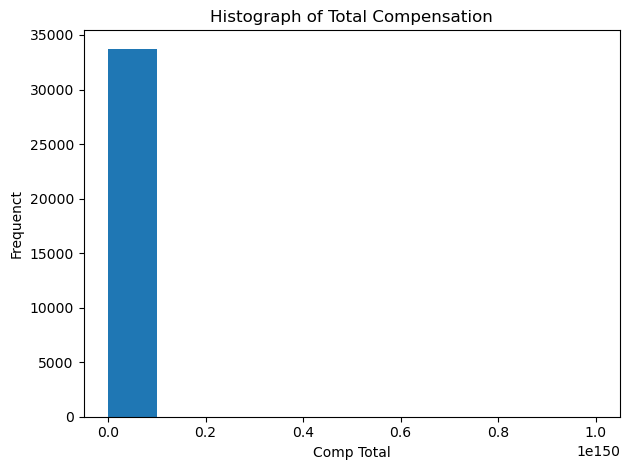

In [20]:
## Write your code here
plt.hist(df['CompTotal'].dropna())
plt.xlabel('Comp Total')
plt.ylabel('Frequenct')
plt.title('Histograph of Total Compensation')
plt.tight_layout()
plt.show()

**Box Plots**

Plot a box plot of Age.


In [31]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
"""

df = pd.read_sql_query(QUERY, conn)
df

Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568

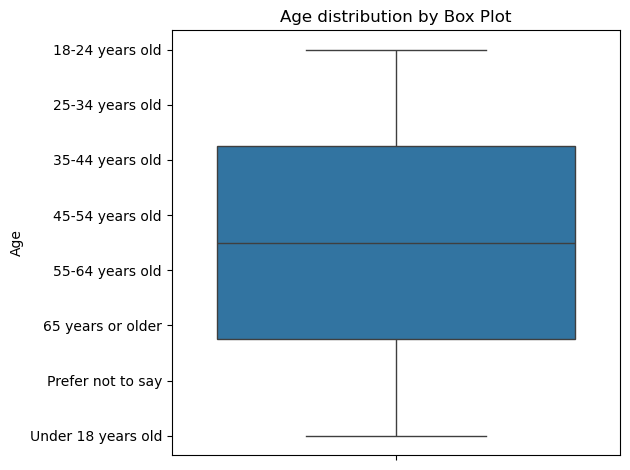

In [55]:
## Write your code here
sns.boxplot(data = df, y = 'Age')
plt.xticks(rotation = 90)
plt.title('Age distribution by Box Plot')
plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [57]:
## Write your code here
QUERY = """
SELECT Age, WorkExp
FROM main
"""

df = pd.read_sql_query(QUERY, conn)
df

Age  WorkExp
0      Under 18 years old      NaN
1         35-44 years old     17.0
2         45-54 years old      NaN
3         18-24 years old      NaN
4         18-24 years old      NaN
...                   ...      ...
65432     18-24 years old      NaN
65433     25-34 years old      NaN
65434     25-34 years old      NaN
65435     18-24 years old      5.0
65436     18-24 years old      NaN

[65437 rows x 2 columns]

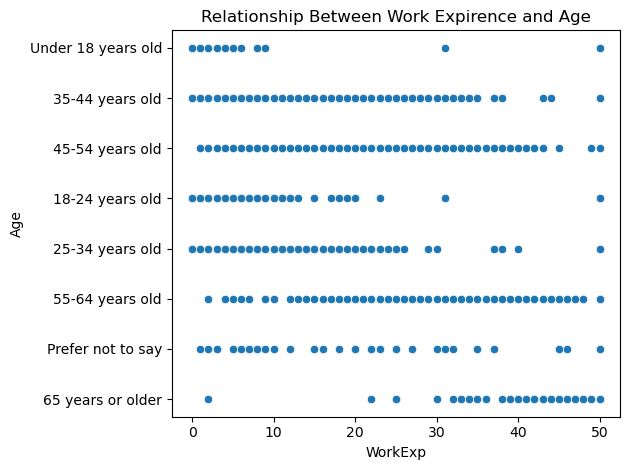

In [60]:
sns.scatterplot(data=df, x = 'WorkExp', y ='Age')
plt.title('Relationship Between Work Expirence and Age')
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [80]:
## Write your code here
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main 
"""

df = pd.read_sql_query(QUERY, conn)
df

TimeSearching Frustration                 Age
0              None        None  Under 18 years old
1              None        None     35-44 years old
2              None        None     45-54 years old
3              None        None     18-24 years old
4              None        None     18-24 years old
...             ...         ...                 ...
65432          None        None     18-24 years old
65433          None        None     25-34 years old
65434          None        None     25-34 years old
65435          None        None     18-24 years old
65436          None        None     18-24 years old

[65437 rows x 3 columns]

In [83]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

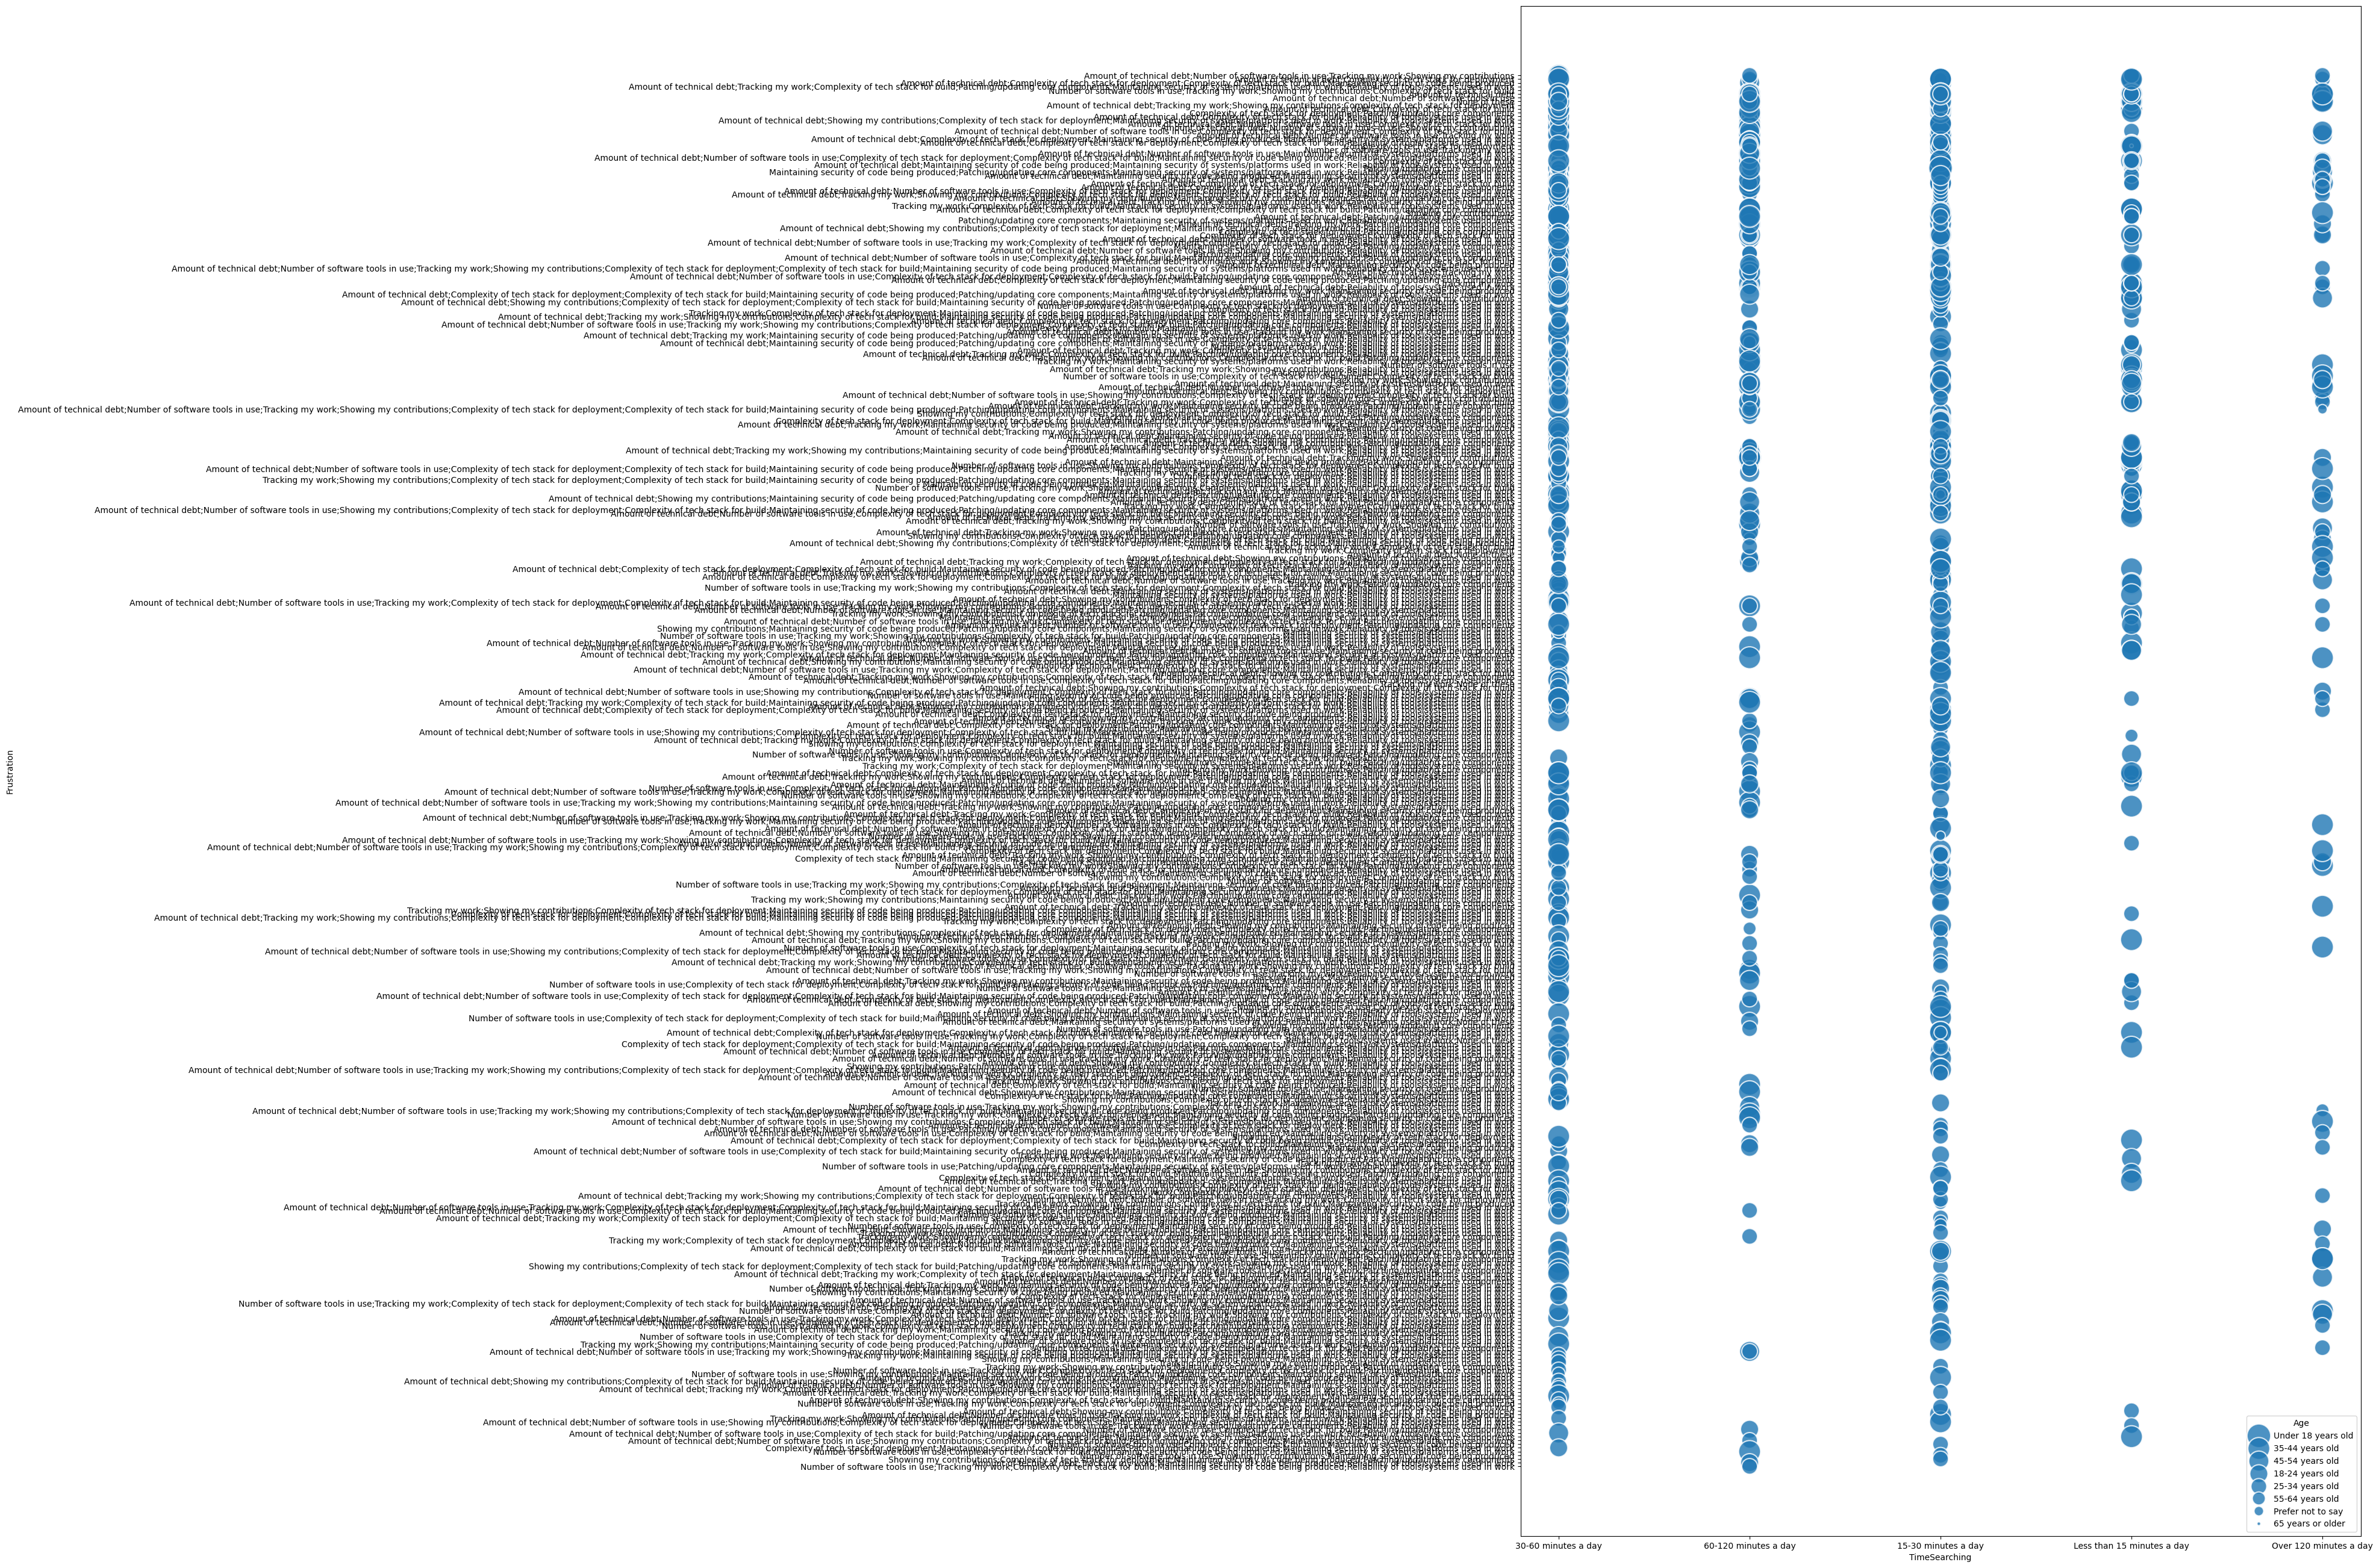

In [70]:
plt.figure(figsize=( 18, 33))
sns.scatterplot(
    x = df_head['TimeSearching'],
    y = df_head['Frustration'],
    size =df_head['Age'],
    sizes = (20, 800), 
    alpha = 0.8)

plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [76]:
## Write your code here

QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as Count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY, conn)
df

DatabaseWantToWorkWith  Count
0             PostgreSQL   3738
1      PostgreSQL;SQLite   1533
2                 SQLite   1476
3   Microsoft SQL Server   1431
4                  MySQL   1139

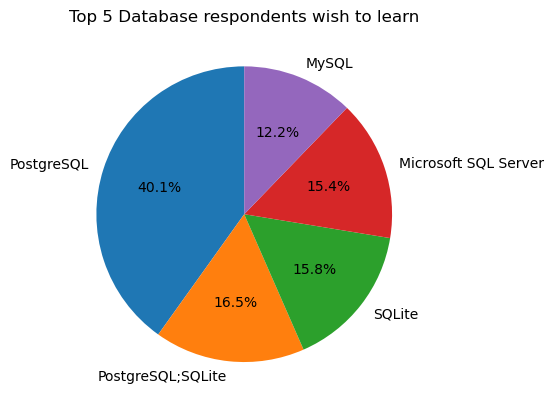

In [79]:
plt.pie(df['Count'], labels = df['DatabaseWantToWorkWith'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Database respondents wish to learn')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [85]:
## Write your code here
QUERY = """
SELECT TimeSearching, TimeAnswering
FROM main
WHERE Age = '25-34 years old'
"""

df = pd.read_sql_query(QUERY, conn)
df

TimeSearching        TimeAnswering
0                            None                 None
1             15-30 minutes a day  30-60 minutes a day
2      Less than 15 minutes a day  15-30 minutes a day
3            60-120 minutes a day  15-30 minutes a day
4                            None                 None
...                           ...                  ...
23906                        None                 None
23907                        None                 None
23908                        None                 None
23909                        None                 None
23910                        None                 None

[23911 rows x 2 columns]

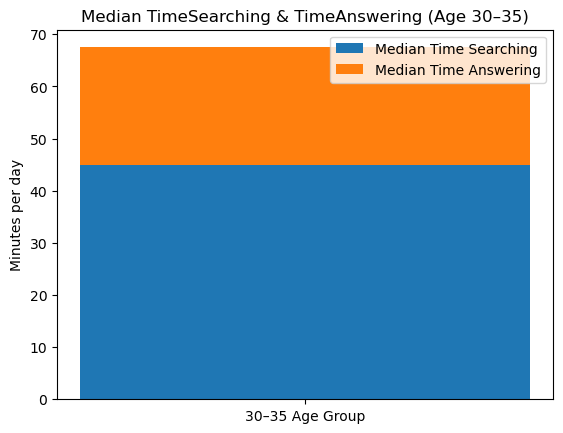

In [92]:
time_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "Over 60 minutes a day": 75
}

df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)
df['TimeAnsweringNum'] = df['TimeAnswering'].map(time_map)

df_clean = df.dropna(subset=['TimeSearchingNum', 'TimeAnsweringNum'])

median_search = df_clean['TimeSearchingNum'].median()
median_answer = df_clean['TimeAnsweringNum'].median()

plt.bar(["30–35 Age Group"], [median_search], label="Median Time Searching")

plt.bar(["30–35 Age Group"], 
        [median_answer], 
        bottom=[median_search], 
        label="Median Time Answering")

plt.ylabel("Minutes per day")
plt.title("Median TimeSearching & TimeAnswering (Age 30–35)")
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [108]:
## Write your code here
QUERY = """
SELECT CompTotal,Age
FROM main
WHERE Age IN ('45-54 years old','55-64 years old') 
"""

df = pd.read_sql_query(QUERY, conn)

In [109]:
df_clean = df.dropna(subset=['CompTotal'])

median_age = df_clean.groupby('Age')['CompTotal'].median()


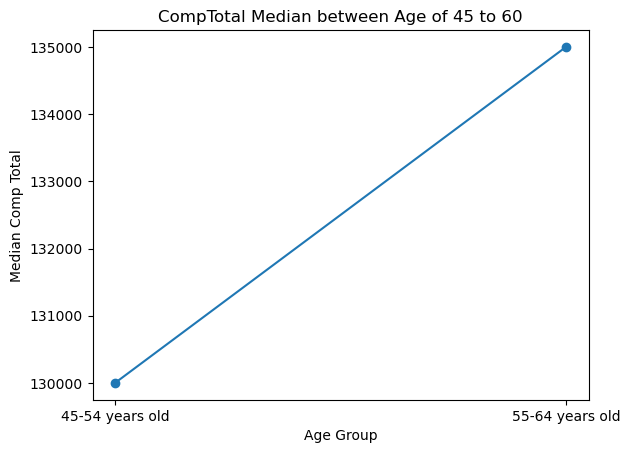

In [110]:

plt.plot(median_age.index, median_age.values, marker = 'o')
plt.title('CompTotal Median between Age of 45 to 60')
plt.xlabel('Age Group')
plt.ylabel('Median Comp Total')
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here
QUERY = """
SELECT MainBranch
FROM main
WHER MainBranch IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

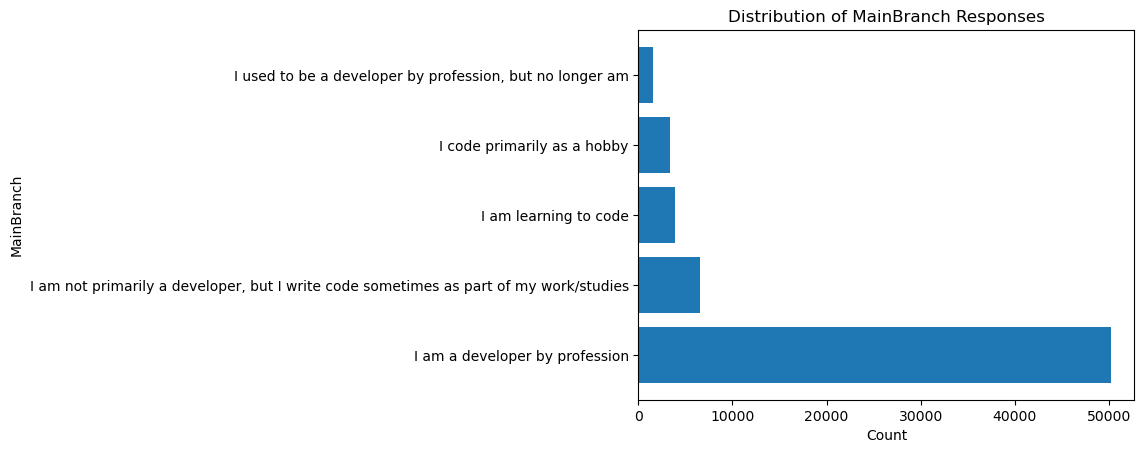

In [122]:
branch_count = df['MainBranch'].value_counts()

plt.barh(branch_count.index, branch_count.values)
plt.xlabel("Count")
plt.ylabel("MainBranch")
plt.title("Distribution of MainBranch Responses")
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [123]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
